# Predicting heart disease using machine learning

This notebook looks into various Phyhon-based libraries of machine learning and data science in an attempt to build a machine learning model capable of predicting wheather or not someone had heart disease or not based on their medical attributes.

Approach used:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling 
6. Experimentation


## 1.Problem Definition 
>Given clinical parameter about a patient can we predict weather or not they have heart disease?



## 2.Data

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date.

The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

**Kaggle Version** : https://www.kaggle.com/ronitf/heart-disease-uci

**Original Database** : https://archive.ics.uci.edu/ml/datasets/heart+Disease




## 3.Evaluation
>If we can reach 90% accuracy at predicting wheather or not a person has a heart disease during the proof of concept , we'll pursue the project 

## 4.Features

**Create Data Directory**

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* Target 1 or 0

## Preparing the tools
We are going to use Pandas,Matplotlib and NumPy for data Analysis and manipulation

In [1]:
# Importing all the tools we need

# Regular EDA(exploratory data analysis) and plotting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

### Import the dataset

In [2]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.shape

(303, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

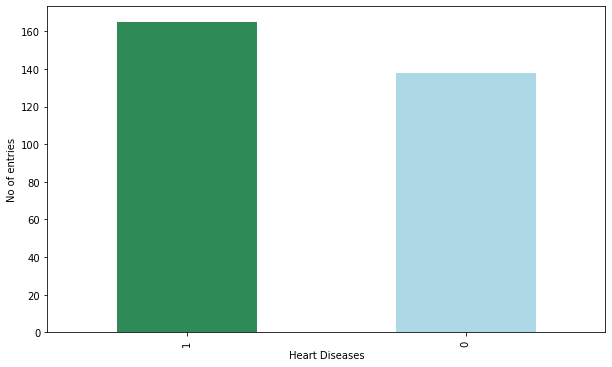

In [7]:
df.target.value_counts().plot(kind= "bar",color = ["seagreen","lightblue"],figsize=(10,6),xlabel = 'Heart Diseases',ylabel = "No of entries");

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
#Are there any missning values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease frequency according to sex 

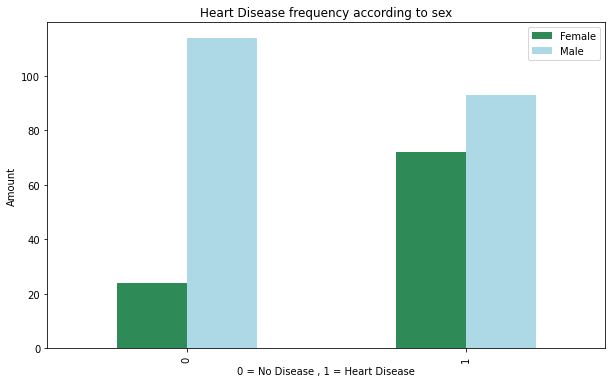

In [11]:
pd.crosstab(df.target,df.sex).plot(kind = "bar",
                                   color = ["seagreen","lightblue"],
                                   figsize = (10,6),
                                   title = "Heart Disease frequency according to sex",
                                   xlabel = "0 = No Disease , 1 = Heart Disease",
                                   ylabel = "Amount",
                                  )
plt.legend(["Female","Male"]);


### Age vs Heart Rate for Heart Disease 

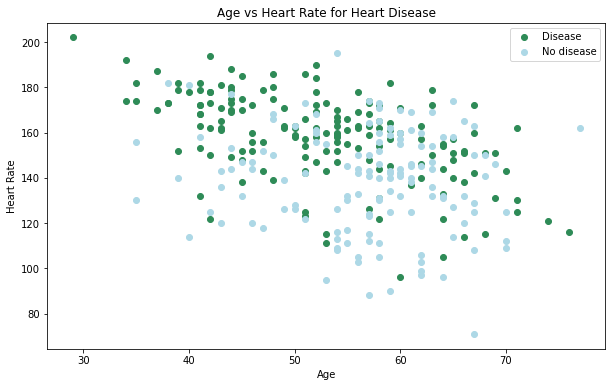

In [12]:
plt.figure(figsize=(10,6))

# Positive Examples
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],color = "seagreen");

# Negative Examples 
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color = "lightblue");

plt.title("Age vs Heart Rate for Heart Disease")
plt.xlabel("Age")
plt.ylabel("Heart Rate")
plt.legend(["Disease","No disease"])
plt.show()


### Checking the distrubutition of age with histrogram

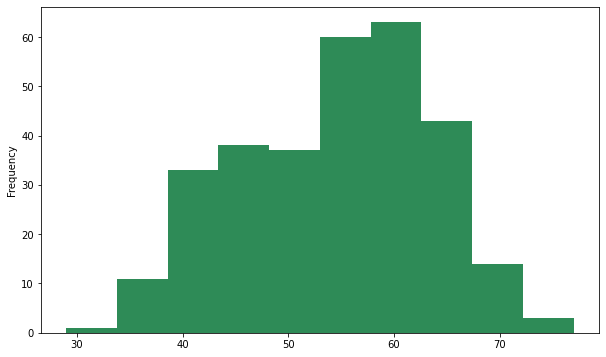

In [13]:
df.age.plot(kind = "hist",color = "seagreen",figsize=(10,6));

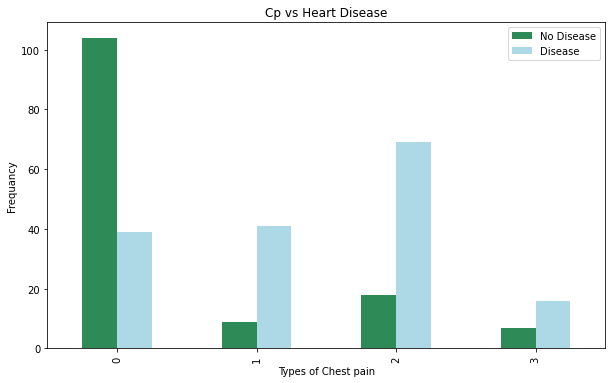

In [14]:
pd.crosstab(df.cp,df.target).plot(kind = "bar",
                                   color = ["seagreen","lightblue"],
                                   figsize = (10,6));
plt.title("Cp vs Heart Disease");
plt.xlabel("Types of Chest pain");
plt.ylabel("Frequancy");
plt.legend(["No Disease","Disease"]);

# we can Clearly see the type "2" Non-Angina pain is mostly related to heart Disease even though its not related to the heart
# And type 0 is the least 

### Making a Correlation Matrix

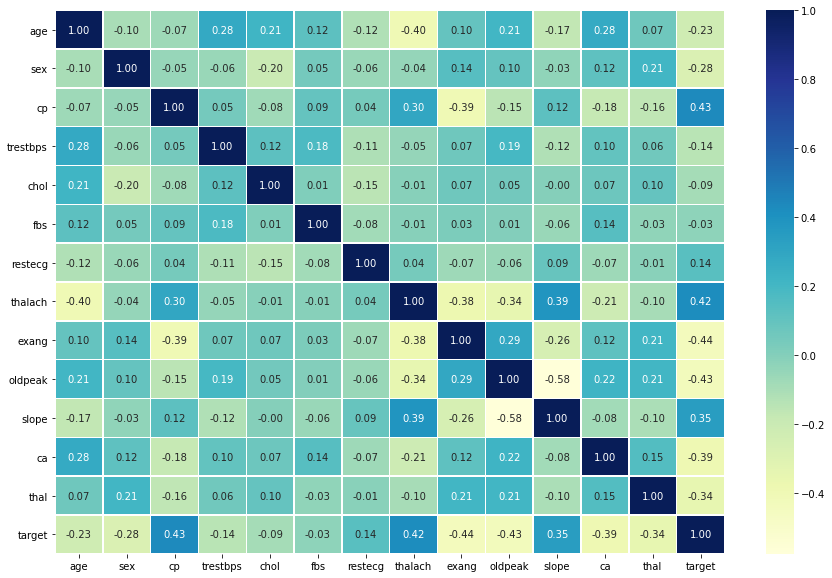

In [15]:
corr_matrix = df.corr();
fig,ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidth = 0.5,
                fmt = ".2f",
                cmap = "YlGnBu");


## 5.Modelling 

In [16]:
# Splitting X and Y 
X = df.drop(["target"],axis = 1)
Y = df["target"]

In [17]:
# Splitting the data into train and test
np.random.seed(4)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

### Building a model

We will be tryin to build 3 different models :
1. Logistic Regression 
2. K-Nearest Neighbours Classifier 
3. Random Forest Classifier 

In [18]:
# putting models in a dictionary 
models = {"Logistic Regression ": LogisticRegression(),
          "KNN":KNeighborsClassifier(),
           "Random Forest ":RandomForestClassifier()}

# Creating a function to fit and score models 
def fit_and_score(models,X_train,X_test,Y_train,Y_test):
    """
    Fits and evaluates given machine learning models .
    models: a dict of different scikit learn models
    X_train: training data (no labels)
    X_test: testing data (no lablels)
    Y_train: training labels
    Y_test: testing lables
    
    """
    
    #Set Random seed
    
    np.random.seed(4)
    
    #Make a dict to keep models scores 
    
    model_scores={}
    
    # loop through models 
    for name,model in models.items():
        #Fit the model to data 
        model.fit(X_train,Y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test,Y_test)
    return model_scores

In [41]:
model_scores = fit_and_score(models,X_train,X_test,Y_train,Y_test)
model_scores

C:\Users\ashli\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

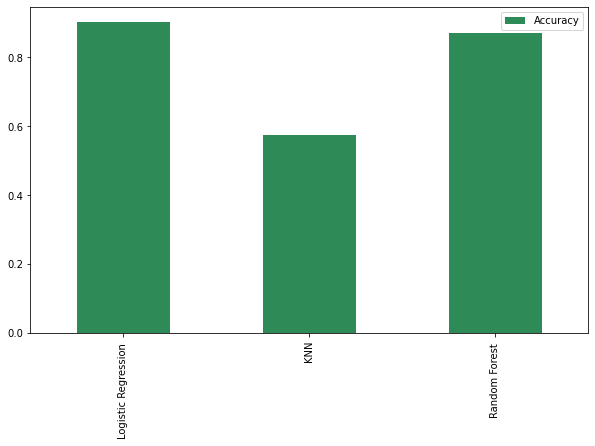

In [20]:
model_compare = pd.DataFrame(model_scores,index = ["Accuracy"])
model_compare.T.plot.bar(color = "seagreen",figsize = (10,6))

Now let's look at the following 
1. Hyperparameter tuning
2. Feature importance
3. Confusion Matrix
4. Cross-Validation 
5. Precision 
6. Recall 
7. F1 score 
8. Classification Report
9. ROC curve
10. Area under the curve 

### 1.Hyperparameter Tuning - by Hand

a. KNN

In [21]:

test_scores = []

#Create a list for n_neighbour parameter

neighbours = range(1,21)

#Setup KNN

knn = KNeighborsClassifier()

# looping through different values of n_neighbour parametersabs

for i in neighbours:
    knn.set_params(n_neighbors = i)
    
    # Fitting the model 
    knn.fit(X_train,Y_train)
    
    # Updating test_scores
    
    
    test_scores.append(knn.score(X_test,Y_test))

The max score of test data is  72.13 %


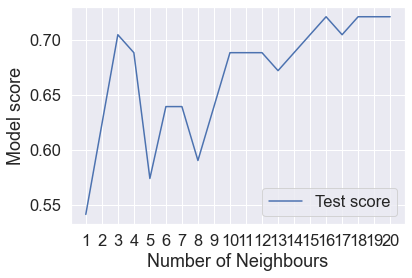

In [40]:
plt.plot(neighbours,test_scores,label = "Test score")
plt.xlabel("Number of Neighbours")
plt.ylabel("Model score")
plt.xticks(np.arange(1,21,1))
plt.legend()
p = round(max(test_scores)*100,2)
print("The max score of test data is ",p,"%")



### Hyperparameter tuning  -  by RandomizedSearchCV

We are going to tune:-
   1. Logistic Regresstion
   2. Random Forest Classifier 

#### Tuning LogisticRegressor

In [23]:
# Create Hyperparameter grid for Logistic Regression 

log_reg_grid = {"C":np.logspace(-4,4,15),
                "solver":['newton-cg', 'liblinear' ]}



In [24]:
# Tune LogisticRegression

np.random.seed(4)

rsCV_log_reg = RandomizedSearchCV(LogisticRegression(),
                                 param_distributions=log_reg_grid,
                                 cv = 10,
                                 n_iter = 20,
                                  verbose = True)
rsCV_log_reg.fit(X_train,Y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 3.72759372e-04, 1.38949549e-03, 5.17947468e-03,
       1.93069773e-02, 7.19685673e-02, 2.68269580e-01, 1.00000000e+00,
       3.72759372e+00, 1.38949549e+01, 5.17947468e+01, 1.93069773e+02,
       7.19685673e+02, 2.68269580e+03, 1.00000000e+04]),
                                        'solver': ['newton-cg', 'liblinear']},
                   verbose=True)

In [25]:
print("The Accuracy of this model after tuning is:",round(rsCV_log_reg.score(X_test,Y_test)*100,2),"%") 
print("The best parameter after tuning are: ")
rsCV_log_reg.best_params_


The Accuracy of this model after tuning is: 91.8 %
The best parameter after tuning are: 


{'solver': 'newton-cg', 'C': 0.2682695795279725}

#### Tuning RandomForestClassifier

In [26]:
# Create Hyperparameter grid for Random forest Classifier

rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}

In [27]:
# Tune RandomForestClassifier

np.random.seed(4)

rsCV_rf = RandomizedSearchCV(RandomForestClassifier(),
                                 param_distributions=rf_grid,
                                 cv = 10,
                                 n_iter = 20,
                                 verbose = True)
rsCV_rf.fit(X_train,Y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [28]:
print("The Accuracy of this model after tuning is:",round(rsCV_rf.score(X_test,Y_test)*100,2),"%") 
print("The best parameter after tuning are: ")
rsCV_rf.best_params_

The Accuracy of this model after tuning is: 91.8 %
The best parameter after tuning are: 


{'n_estimators': 810,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_depth': None}

### Hyperparameter tuning - by GridSearchCV

In [29]:
# Tune LogisticRegression(GridSearchCV)

log_reg_grid = {"C":np.logspace(-4,4,30),
                "solver":['newton-cg', 'liblinear' ]}

gsCV_log_reg  = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv = 10,
                          verbose = True)

gsCV_log_reg.fit(X_train,Y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['newton-cg', 'liblinear']},
             verbose=True)

In [30]:
print("The best parameter for this model is:",gsCV_log_reg.best_params_)
print("The score of this model using this method is",round(gsCV_log_reg.score(X_test,Y_test)*100,2),"%")

The best parameter for this model is: {'C': 0.38566204211634725, 'solver': 'liblinear'}
The score of this model using this method is 91.8 %


Evaluating our tuned Machine Learning Classifier Model
* Confusion Matrix
* Cross-Validation 
* Precision 
* Recall 
* F1 score 
* Classification Report
* ROC curve
* Area under the curve 

### ROC curve and AUC metric

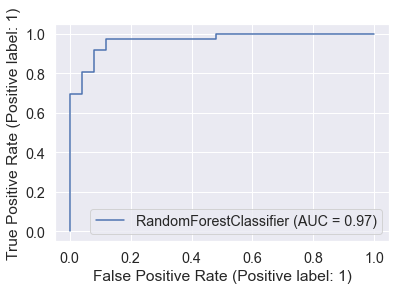

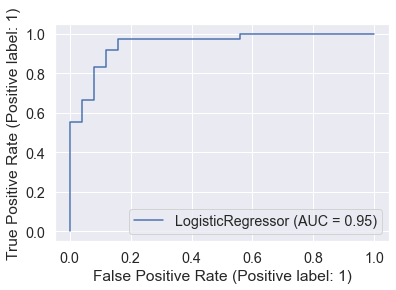

In [31]:
# Plot ROC curve and calculate AUC metric(RandomForestClassifier)
sns.set(font_scale = 1.3)
plot_roc_curve(rsCV_rf,X_test,Y_test,
               name = "RandomForestClassifier")

# Plot ROC curve and calculate AUC metric(LogisticRegressor)

plot_roc_curve(rsCV_log_reg,X_test,Y_test,
               name = "LogisticRegressor")

### Confusion Matrix

In [32]:


## Create a function for confusion_matrix

def plot_conf_mat(Y_test,y_preds,Title):
    
    sns.set(font_scale = 1.5)
    """
    Plots a confusion matric based on sns heatmap
    
    """
    
    fig,ax = plt.subplots(figsize = (5,4))
    
    ax = sns.heatmap(confusion_matrix(Y_test,y_preds),
                    annot = True)
    plt.xlabel("True Label")
    plt.ylabel("Predicted label ")
    plt.title(Title)
    

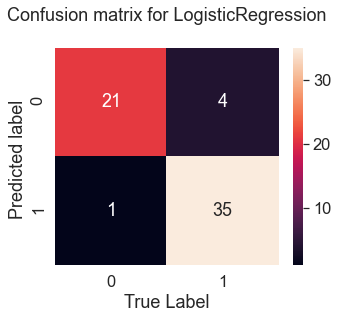

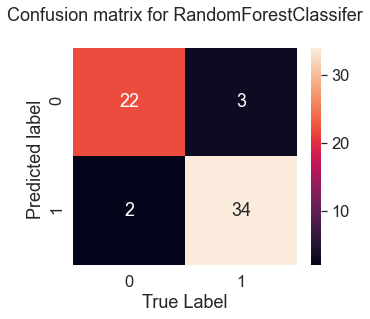

In [33]:
# plotting confusion matrix(LogisticRegression)

Title1 = "Confusion matrix for LogisticRegression\n"

y_preds_lof_reg = rsCV_log_reg.predict(X_test)

plot_conf_mat(Y_test,y_preds_lof_reg,Title1)

#plotting comfusion matrix(RandomForestClassifier)

Title2 = "Confusion matrix for RandomForestClassifer\n"

y_preds_rf = rsCV_rf.predict(X_test)
plot_conf_mat(Y_test,y_preds_rf,Title2)


## Classification Report as well as cross-validated precision,recall, and F10-score

In [34]:
names = ['No Disease','Disease']
print("-Classification Report for Logistic Regression model\n"
      ,classification_report(Y_test,y_preds_lof_reg,
                             target_names=names))

print("-Classification Report for Random Forest Classifier\n"
      ,classification_report(Y_test,y_preds_rf,
                             target_names=names))

-Classification Report for Logistic Regression model
               precision    recall  f1-score   support

  No Disease       0.95      0.84      0.89        25
     Disease       0.90      0.97      0.93        36

    accuracy                           0.92        61
   macro avg       0.93      0.91      0.91        61
weighted avg       0.92      0.92      0.92        61

-Classification Report for Random Forest Classifier
               precision    recall  f1-score   support

  No Disease       0.92      0.88      0.90        25
     Disease       0.92      0.94      0.93        36

    accuracy                           0.92        61
   macro avg       0.92      0.91      0.91        61
weighted avg       0.92      0.92      0.92        61



### Calculate evaluation metrics using cross-validation

We are going to calculate accuracy,precision,recall and F1 score of our model using cross_validation

In [35]:
### Function for cross-validation for accuracy,precision,recall and f1 score

def c_metrics(model,cv_value):
    
    """
    A function to calculate cross-validated classification matrix for any machine learning model
    
    """
    # Cross-validated accuracy
    cv_acc = cross_val_score(model,X,Y,cv = cv_value,scoring = 'accuracy')
    cv_acc = np.mean(cv_acc)
    
    # Cross-validated Precision
    cv_pre = cross_val_score(model,X,Y,cv = cv_value,scoring = 'precision')
    cv_pre = np.mean(cv_pre)
    
    # Cross-valiated Recall
    cv_recall = cross_val_score(model,X,Y,cv = cv_value,scoring = 'recall')
    cv_recall = np.mean(cv_recall)
    
    # Cross-validated F1
    cv_f1 = cross_val_score(model,X,Y,cv = cv_value,scoring = 'f1')
    cv_f1 = np.mean(cv_f1)
    
    # Cross-validated metrix
    cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                          "Precision":cv_pre,
                          "Recall":cv_recall,
                          "F1":cv_f1},index=[0])
    cv_metrics.T.plot.bar(title = "Cross-validated classification matrix",
                      figsize = (10,6),
                      color = "Seagreen",
                      legend = False)

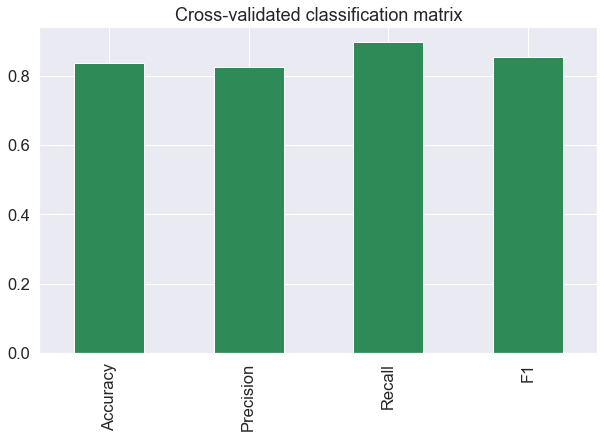

In [36]:
model = LogisticRegression(C = 0.2682695795279725,solver = 'newton-cg')

c_metrics(model,10)

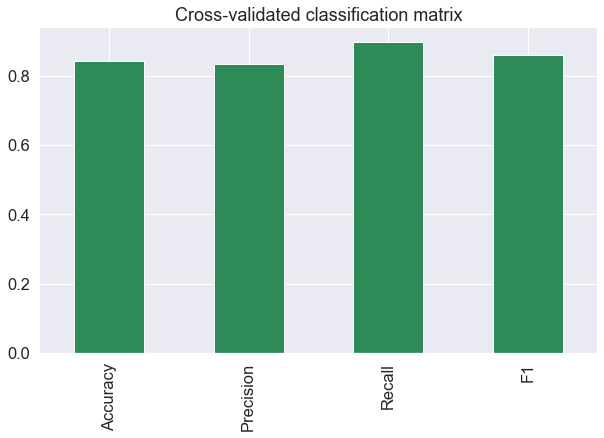

In [37]:
model = RandomForestClassifier(n_estimators=810,
                              min_samples_split=10,
                              min_samples_leaf=5,
                              max_depth=None)

c_metrics(model,10)

### Feature Importance

Feature importance is asking ,"Which features contributed most to the outcome of a model and how did they contribute"

Lets find the feature importance of LogisticRegression model

In [38]:
model = LogisticRegression(C = 0.2682695795279725,solver = 'newton-cg')
model.fit(X_train,Y_train);

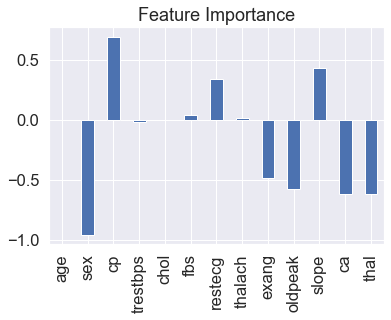

In [39]:
feature_dict = dict(zip(df.columns,list(model.coef_[0])))
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title = "Feature Importance",legend = False);